# Vanilla fixed for floating 2Y coupon swap

---

In [6]:
import numpy as np 
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Introduction

### Dataset overview

In [7]:
df = pd.read_csv(
    r"D:\Toutenun\RAM\histo_swap_yields_2Y\histo_swap_yields_2Y.csv", 
    parse_dates=['date'], 
    index_col='date'
)
pd.concat([df.head(2), df.tail(2)])

AUD      CAD      CHF      CLP     COP      CZK      EUR  \
date                                                                       
2006-01-03  5.69383  4.08999      NaN      NaN     NaN  2.77088  3.03996   
2006-01-04  5.65559  3.97366      NaN      NaN     NaN  2.73029  2.94028   
2021-12-30  0.95915  1.54960 -0.52865  5.52998  5.7786  4.50482 -0.29439   
2021-12-31  0.98687  1.54960 -0.52805  5.52998  5.7786  4.53218 -0.28709   

                GBP      HKD       HUF      ILS       JPY      MXN      NOK  \
date                                                                          
2006-01-03      NaN  4.43018       NaN  5.77987       NaN  8.17000  3.51500   
2006-01-04      NaN  4.34014       NaN  5.70045       NaN  8.15046  3.44000   
2021-12-30  1.02052  0.92922  5.249648  0.35000 -0.035486  7.33991  1.61149   
2021-12-31  1.00554  0.91270  5.252533  0.35000 -0.035486  7.33991  1.61248   

                NZD      PLN      SEK      SGD      USD      ZAR  
date                                                              
2006-01-03  7.11183      NaN  2.89107      NaN  4.67083      NaN  
2006-01-04  7.12040      NaN  2.82210      NaN  4.63963      NaN  
2021-12-30  2.18750  3.92940  0.30026  0.95647  0.75788  5.38966  
2021-12-31  2.17000  3.94573  0.30026  0.97357  0.75788  5.37960

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4146 entries, 2006-01-03 to 2021-12-31
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AUD     4146 non-null   float64
 1   CAD     4146 non-null   float64
 2   CHF     2490 non-null   float64
 3   CLP     3888 non-null   float64
 4   COP     2765 non-null   float64
 5   CZK     4146 non-null   float64
 6   EUR     4146 non-null   float64
 7   GBP     3826 non-null   float64
 8   HKD     4146 non-null   float64
 9   HUF     3889 non-null   float64
 10  ILS     4146 non-null   float64
 11  JPY     2643 non-null   float64
 12  MXN     4146 non-null   float64
 13  NOK     4146 non-null   float64
 14  NZD     4146 non-null   float64
 15  PLN     3889 non-null   float64
 16  SEK     4146 non-null   float64
 17  SGD     3953 non-null   float64
 18  USD     4146 non-null   float64
 19  ZAR     3631 non-null   float64
dtypes: float64(20)
memory usage: 680.2 KB


In [149]:
df.index.is_monotonic_increasing

True

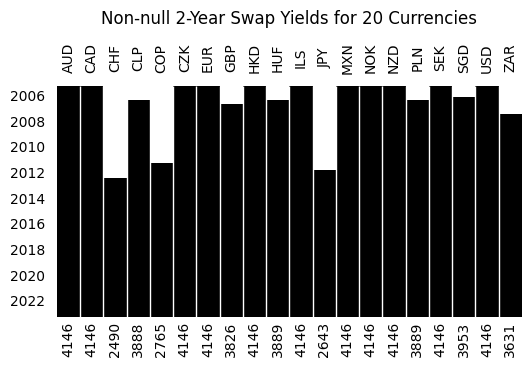

In [150]:
# Heatmap of non-null 2-Year Swap Yields for 20 Currencies
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cmap='gray', cbar=False, linewidths=0.002, xticklabels=df.columns, yticklabels=False)

years = range(2006, 2023, 2)  
for i, year in enumerate(years):
    plt.text(-0.5, i * len(df) / len(years) + 200, str(year), ha='right', va='center', fontsize=10)

for i, column in enumerate(df.columns):
    plt.text(i+0.5, -500, column, ha='center', va='center', fontsize=10, rotation=90)
    plt.text(i+0.5, 4550, str(df.count()[column]), ha='center', va='center', fontsize=10, rotation=90)

for i in range(1, len(df.columns)):
    plt.vlines(x=i, ymin=0, ymax=len(df), color='white', linewidth=1)

plt.xticks([])
plt.ylabel('')  
plt.text(len(df.columns) / 2, -1200, "Non-null 2-Year Swap Yields for 20 Currencies", ha='center', va='center', fontsize=12)
plt.show()


In [151]:
# Yearly counts of entries for 20 currencies and total counts
df_copy = df.copy()
df_copy["year"] = df_copy.index.year
counts = df_copy.groupby("year").count()
counts["Total"] = counts.sum(axis=1)
counts.loc["Total"] = counts.sum()
counts

AUD   CAD   CHF   CLP   COP   CZK   EUR   GBP   HKD   HUF  ...   JPY  \
year                                                               ...         
2006    257   257     0     0     0   257   257     0   257     0  ...     0   
2007    258   258     0   257     0   258   258   195   258   258  ...     0   
2008    259   259     0   259     0   259   259   259   259   259  ...     0   
2009    258   258     0   258     0   258   258   258   258   258  ...     0   
2010    259   259     0   259     0   259   259   259   259   259  ...     0   
2011    258   258     0   258   168   258   258   258   258   258  ...    46   
2012    259   259   152   259   259   259   259   259   259   259  ...   259   
2013    260   260   260   260   260   260   260   260   260   260  ...   260   
2014    260   260   260   260   260   260   260   260   260   260  ...   260   
2015    260   260   260   260   260   260   260   260   260   260  ...   260   
2016    259   259   259   259   259   259   259   259   259   259  ...   259   
2017    258   258   258   258   258   258   258   258   258   258  ...   258   
2018    260   260   260   260   260   260   260   260   260   260  ...   260   
2019    260   260   260   260   260   260   260   260   260   260  ...   260   
2020    261   261   261   261   261   261   261   261   261   261  ...   261   
2021    260   260   260   260   260   260   260   260   260   260  ...   260   
Total  4146  4146  2490  3888  2765  4146  4146  3826  4146  3889  ...  2643   

        MXN   NOK   NZD   PLN   SEK   SGD   USD   ZAR  Total  
year                                                          
2006    257   257   257     0   257    64   257     0   2891  
2007    258   258   258   258   258   258   258     0   4064  
2008    259   259   259   259   259   259   259   259   4403  
2009    258   258   258   258   258   258   258   258   4386  
2010    259   259   259   259   259   259   259   259   4403  
2011    258   258   258   258   258   258   258   258   4600  
2012    259   259   259   259   259   259   259   259   5073  
2013    260   260   260   260   260   260   260   260   5200  
2014    260   260   260   260   260   260   260   260   5200  
2015    260   260   260   260   260   260   260   260   5200  
2016    259   259   259   259   259   259   259   259   5180  
2017    258   258   258   258   258   258   258   258   5160  
2018    260   260   260   260   260   260   260   260   5200  
2019    260   260   260   260   260   260   260   260   5200  
2020    261   261   261   261   261   261   261   261   5220  
2021    260   260   260   260   260   260   260   260   5200  
Total  4146  4146  4146  3889  4146  3953  4146  3631  76580  

[17 rows x 21 columns]

In [152]:
# First non-NaN date for the 20 currencies
first_non_na_dates = df.apply(lambda col: col.first_valid_index())
first_non_na_dates_df = first_non_na_dates.to_frame().T
first_non_na_dates_df.index = ["First non-NaN date"]
first_non_na_dates_df

AUD        CAD        CHF        CLP        COP  \
First non-NaN date 2006-01-03 2006-01-03 2012-06-01 2007-01-03 2011-05-10   

                          CZK        EUR        GBP        HKD        HUF  \
First non-NaN date 2006-01-03 2006-01-03 2007-03-30 2006-01-03 2007-01-02   

                          ILS        JPY        MXN        NOK        NZD  \
First non-NaN date 2006-01-03 2011-10-27 2006-01-03 2006-01-03 2006-01-03   

                          PLN        SEK        SGD        USD        ZAR  
First non-NaN date 2007-01-02 2006-01-03 2006-10-02 2006-01-03 2008-01-02

In [153]:
# Value counts of the first non-NaN date for the 20 currencies
first_non_na_dates_count = first_non_na_dates.value_counts()
first_non_na_dates_count

2006-01-03    11
2007-01-02     2
2012-06-01     1
2011-05-10     1
2007-01-03     1
2007-03-30     1
2011-10-27     1
2006-10-02     1
2008-01-02     1
Name: count, dtype: int64

In [154]:
# Currencies with first non-NaN date 2007-01-02
dates_with_two_occurrences = first_non_na_dates_count[first_non_na_dates_count == 2].index
columns_with_two_occurrences = first_non_na_dates[first_non_na_dates.isin(dates_with_two_occurrences)].index
columns_with_two_occurrences

Index(['HUF', 'PLN'], dtype='object')

In [155]:
# Chronological order of 2007-01-02
sorted_unique_dates = sorted(first_non_na_dates.unique())
date_with_two_occurrences = first_non_na_dates_count[first_non_na_dates_count == 2].index[0]  
formatted_date = date_with_two_occurrences.strftime('%Y-%m-%d')
rank_of_date = sorted_unique_dates.index(date_with_two_occurrences) + 1 
print(f"The date {formatted_date} is at position {rank_of_date} in chronological order.")

The date 2007-01-02 is at position 3 in chronological order.


In [156]:
df.duplicated().sum()

np.int64(0)

### Train and test datasets

In [8]:
# Summary of the full, training, and testing datasets

train_size = int(0.8 * len(df))
split_date = pd.to_datetime('2018-10-23')

df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

len_full = len(df)
len_train = len(df_train)
len_test = len(df_test)

total_years = 16
train_years = total_years * 0.8
test_years = total_years * 0.2

start_date_full = df.index.min()
end_date_full = df.index.max()

start_date_train = df_train.index.min()
end_date_train = df_train.index.max()

start_date_test = df_test.index.min()
end_date_test = df_test.index.max()

data = {
    'size': [1, 0.8, 0.2],
    'Number of entries': [len_full, len_train, len_test],
    'Number of years': [total_years, train_years, test_years],
    'start date': [start_date_full, start_date_train, start_date_test],
    'end date': [end_date_full, end_date_train, end_date_test]
}

df_summary = pd.DataFrame(data, index=['full dataset', 'train dataset', 'test dataset'])
df_summary


size  Number of entries  Number of years start date   end date
full dataset    1.0               4146             16.0 2006-01-03 2021-12-31
train dataset   0.8               3316             12.8 2006-01-03 2018-10-23
test dataset    0.2                830              3.2 2018-10-24 2021-12-31

### Line plots

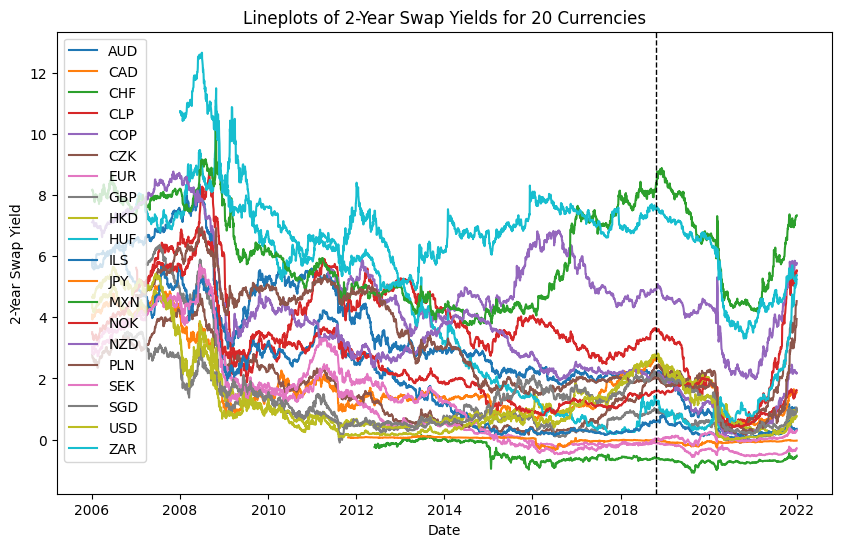

In [158]:
# Lineplots of the 2-Year Swap Yields for 20 currencies over time using Seaborn
plt.figure(figsize=(10, 6))

for column in df.columns:
    sns.lineplot(x=df.index, y=df[column], label=column)

plt.axvline(x=split_date, color='black', linestyle='--', linewidth=1)
plt.title("Lineplots of 2-Year Swap Yields for 20 Currencies")
plt.xlabel("Date")
plt.ylabel("2-Year Swap Yield")
plt.legend(loc='best')
plt.show()

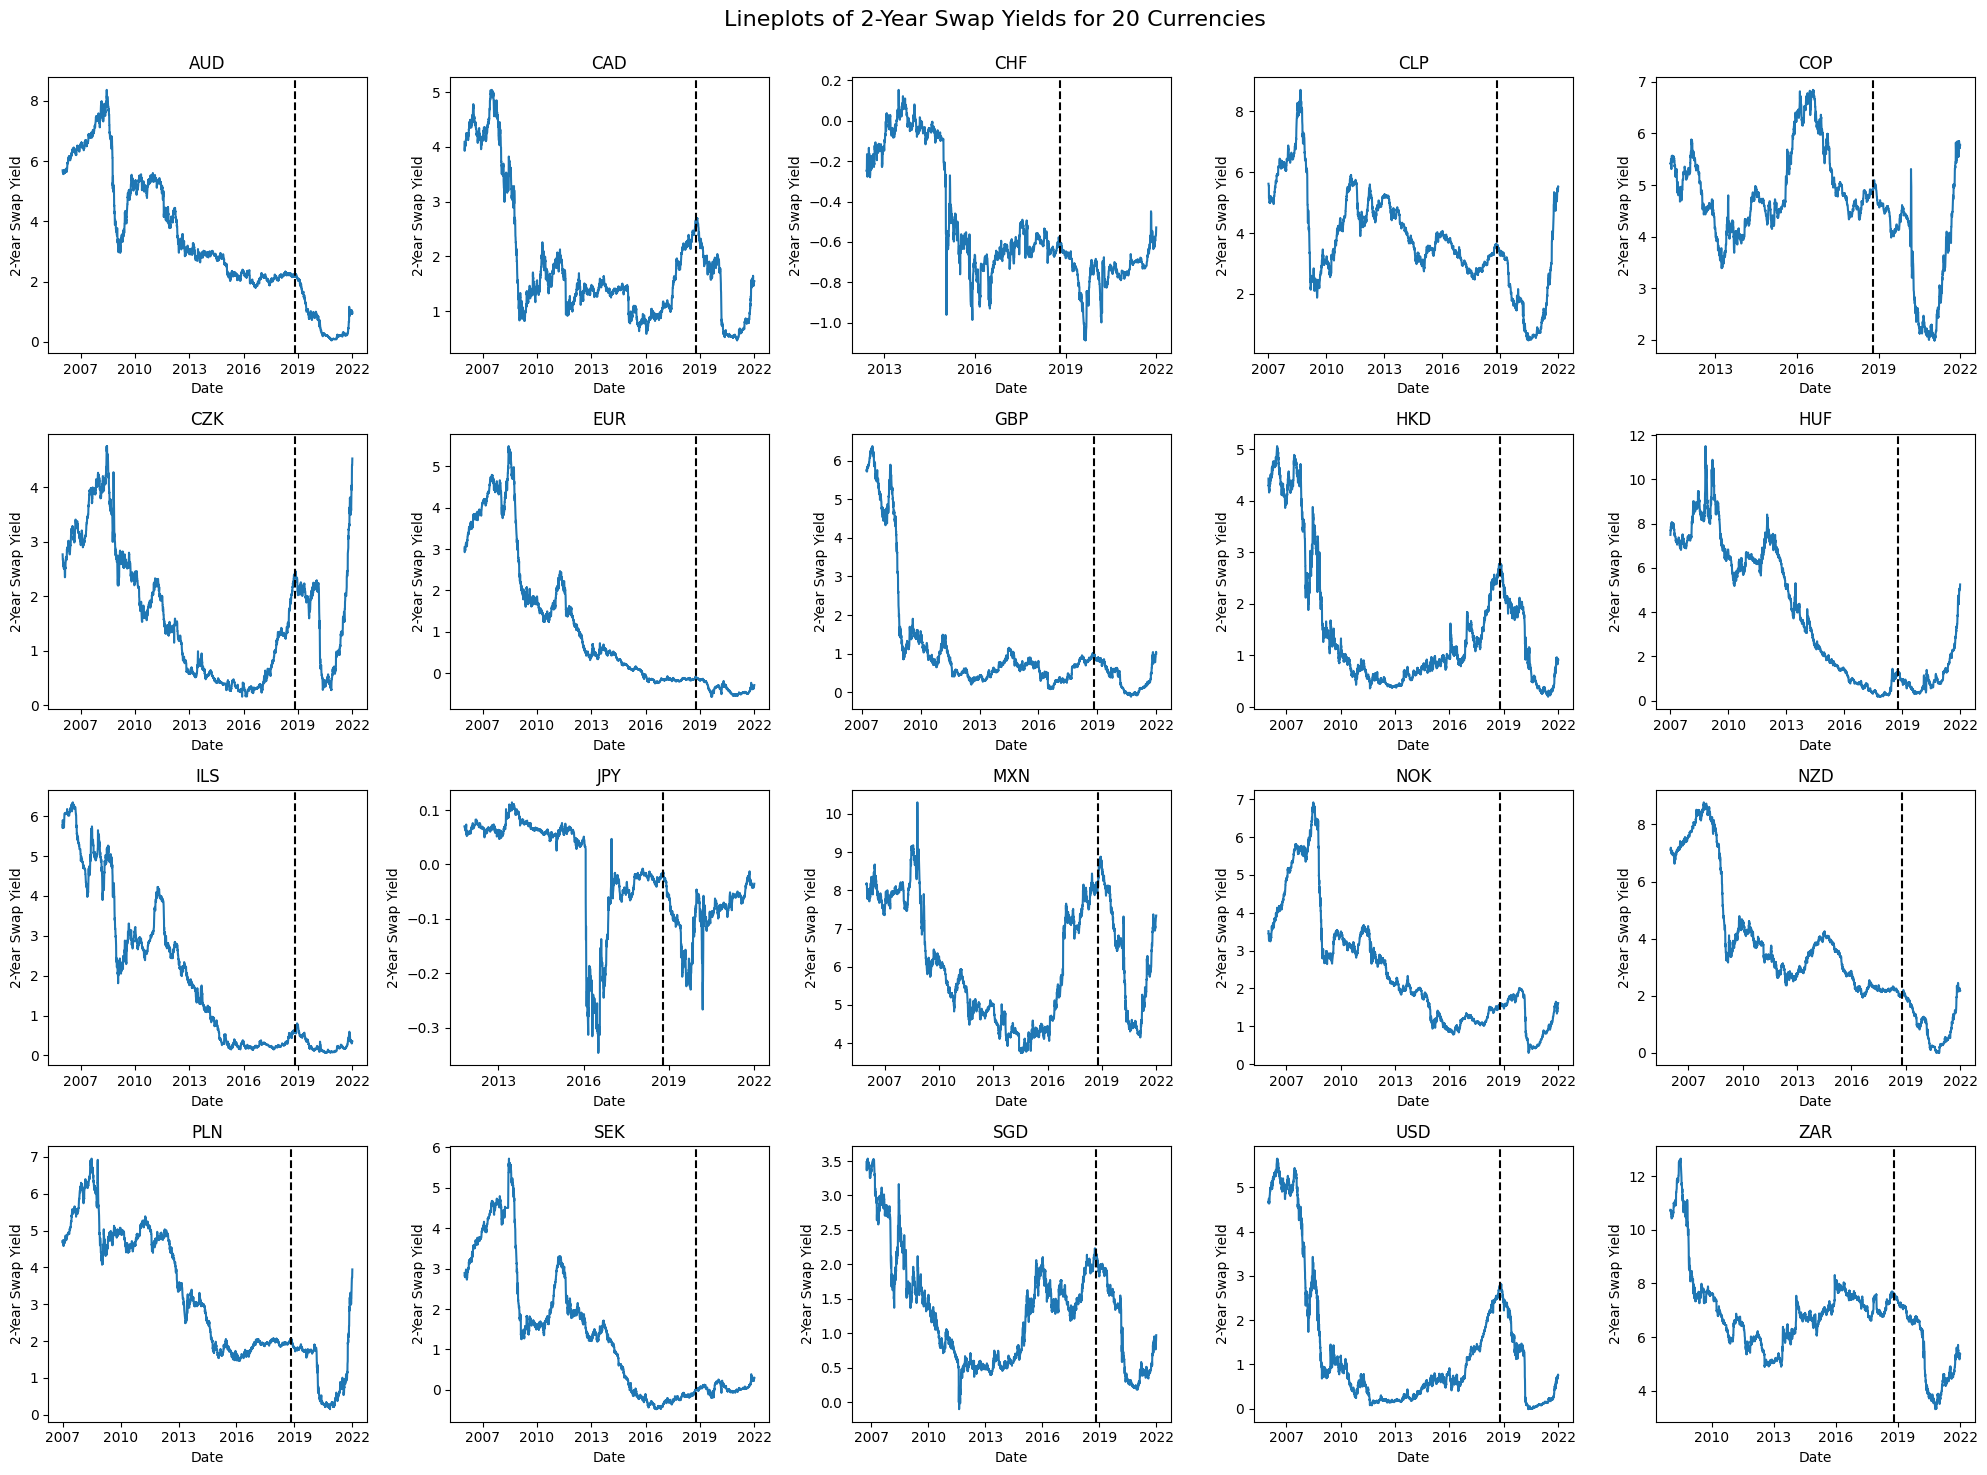

In [159]:
# Linesubplots of the 2-Year Swap Yields for 20 currencies using Seaborn
n_rows = 4
n_cols = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.lineplot(x=df.index, y=df[column], ax=axes[i], label=column, legend=False)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('2-Year Swap Yield')
    axes[i].grid(False)
    axes[i].xaxis.set_major_locator(mdates.YearLocator(3))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[i].axvline(x=split_date, color='black', linestyle='--')


plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.suptitle('Lineplots of 2-Year Swap Yields for 20 Currencies', fontsize=16)
plt.show()

### Histograms and density

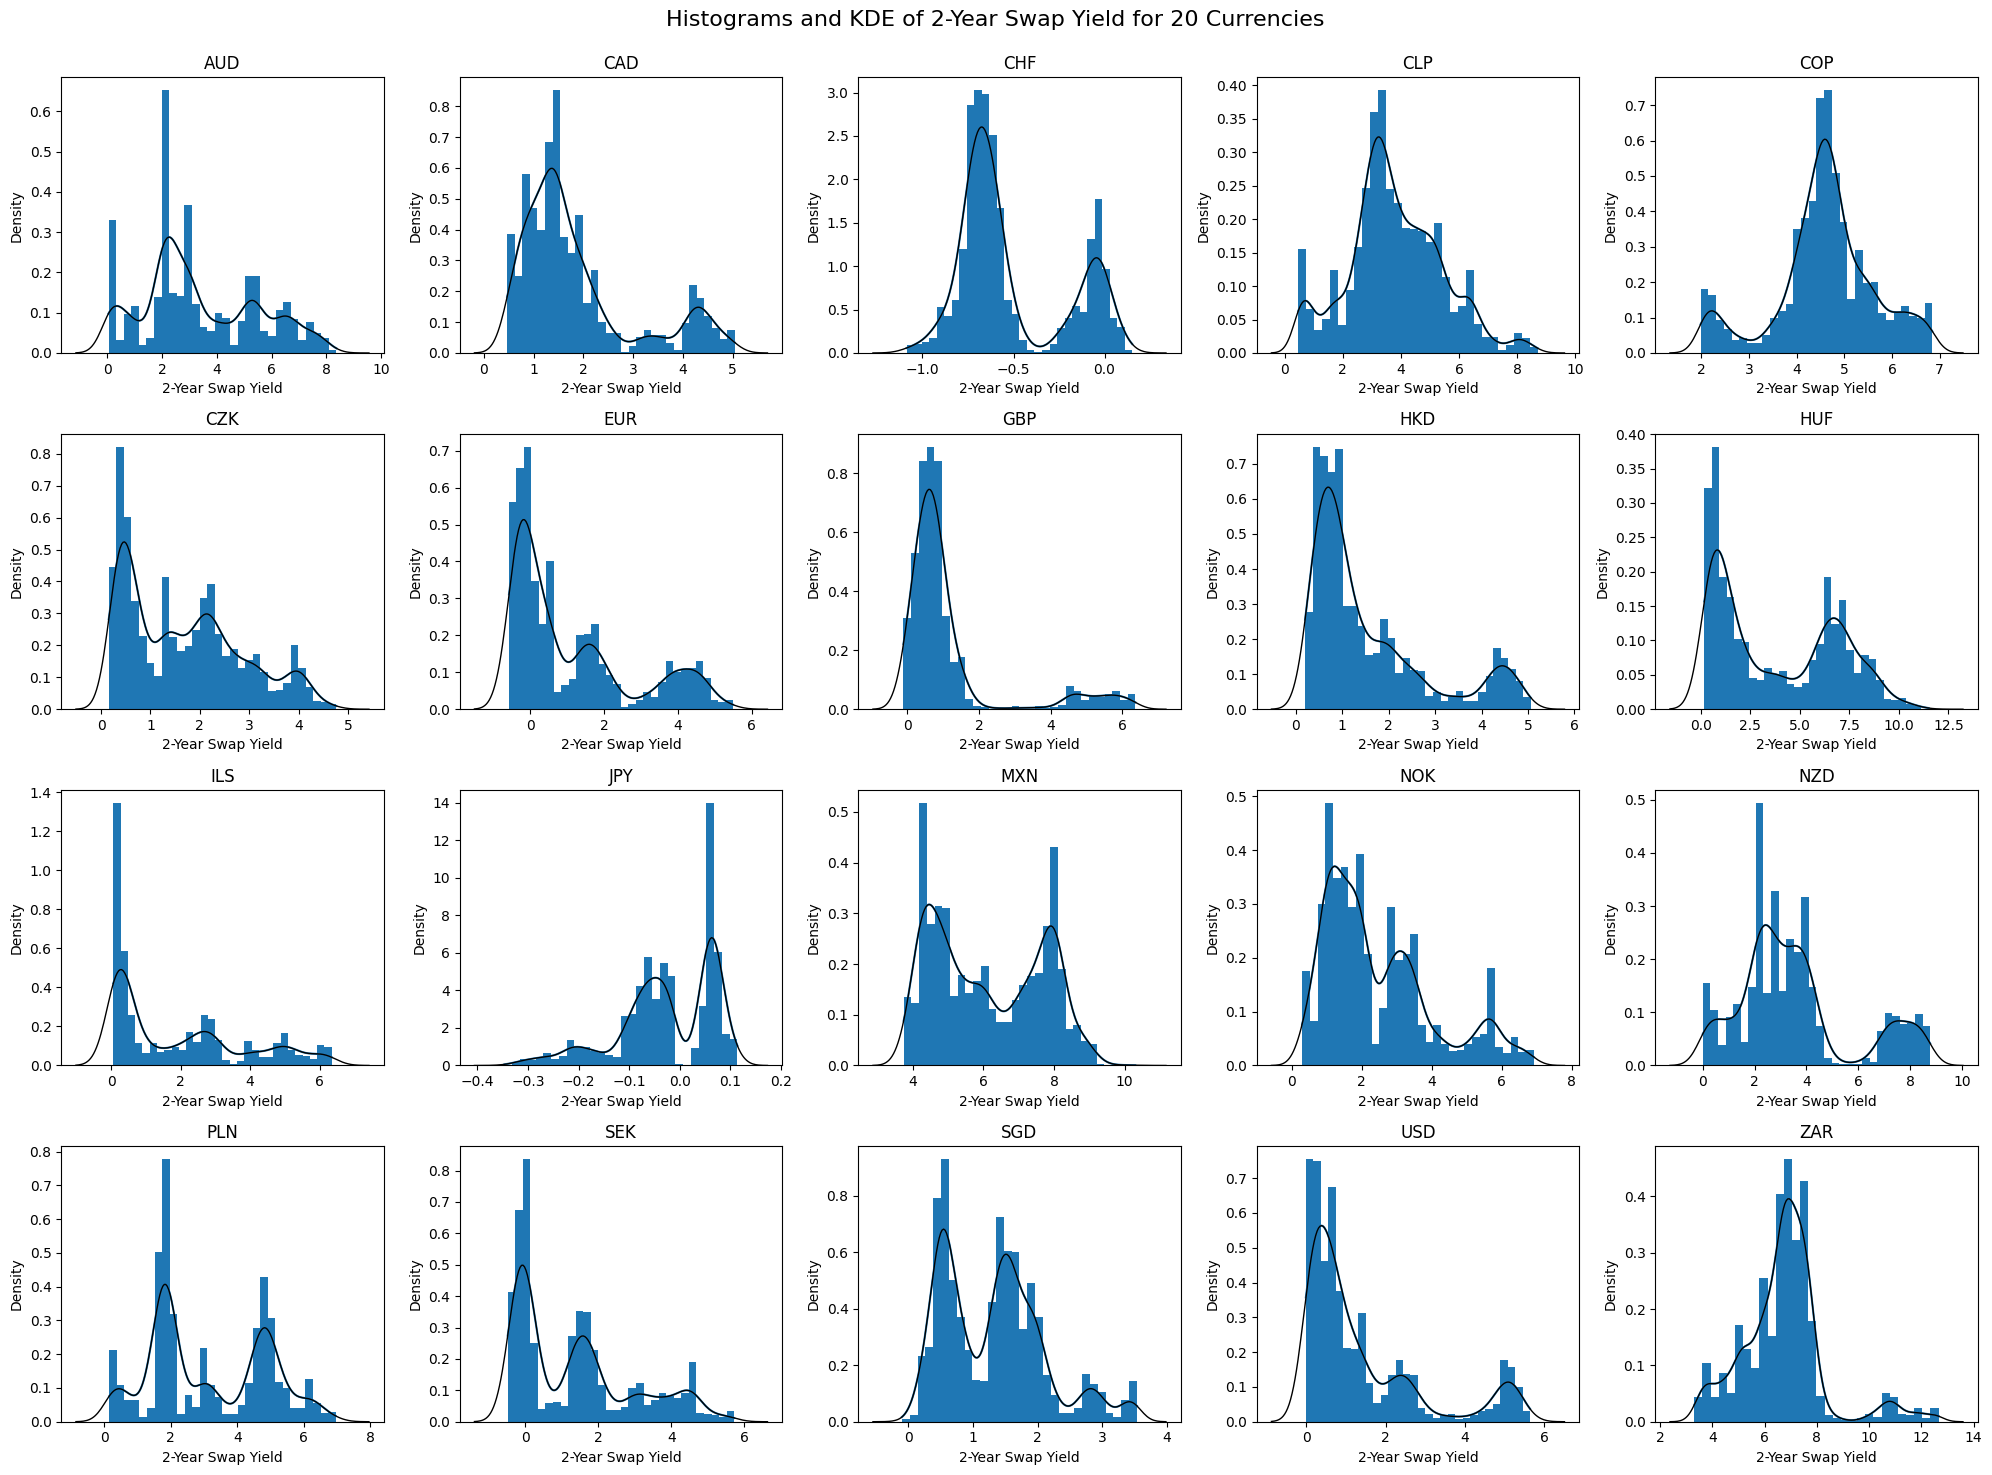

In [160]:
# Histograms and KDEs subplots of the 2-Year Swap Yields for 20 currencies using Seaborn
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axes[i], kde=True, stat='density', bins=30, alpha=1, edgecolor='none')
    sns.kdeplot(df[column], ax=axes[i], color='black', linewidth=1)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('2-Year Swap Yield')
    axes[i].set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Histograms and KDE of 2-Year Swap Yield for 20 Currencies', fontsize=16)
plt.show()

In [161]:
df.describe()

AUD          CAD          CHF          CLP          COP  \
count  4146.000000  4146.000000  2490.000000  3888.000000  2765.000000   
mean      3.357364     1.849782    -0.515721     3.792436     4.594498   
std       2.098282     1.157752     0.294907     1.606344     1.047603   
min       0.042990     0.467210    -1.086910     0.469940     1.985980   
25%       2.066640     1.063105    -0.716947     2.850000     4.151790   
50%       2.880400     1.447160    -0.633680     3.580130     4.613500   
75%       5.180423     2.134247    -0.206173     4.840000     5.147440   
max       8.366290     5.039770     0.152170     8.707300     6.844760   

               CZK          EUR          GBP          HKD          HUF  \
count  4146.000000  4146.000000  3826.000000  4146.000000  3889.000000   
mean      1.673332     1.097970     1.146713     1.551344     3.829981   
std       1.171757     1.649162     1.480155     1.277274     3.017872   
min       0.155000    -0.568760    -0.110340     0.200070     0.183155   
25%       0.561225    -0.162590     0.402443     0.640000     0.902709   
50%       1.490000     0.433130     0.706165     0.980300     3.080000   
75%       2.420000     1.821840     1.010933     2.035950     6.620000   
max       4.760000     5.490210     6.372480     5.060000    11.500000   

               ILS          JPY          MXN          NOK          NZD  \
count  4146.000000  2643.000000  4146.000000  4146.000000  4146.000000   
mean      1.906582    -0.025505     6.120444     2.445153     3.533360   
std       1.895541     0.095821     1.535377     1.542342     2.233766   
min       0.062500    -0.346561     3.744780     0.296930    -0.000000   
25%       0.250000    -0.076594     4.677227     1.214323     2.182500   
50%       1.135335    -0.024658     5.914005     1.957375     3.033750   
75%       2.984120     0.061442     7.679280     3.287650     4.103743   
max       6.345610     0.114074    10.301600     6.918490     8.773220   

               PLN          SEK          SGD          USD          ZAR  
count  3889.000000  4146.000000  3953.000000  4146.000000  3631.000000  
mean      3.115329     1.331552     1.317430     1.399285     6.726651  
std       1.745635     1.609314     0.782551     1.531193     1.601273  
min       0.150000    -0.480060    -0.099820    -0.012010     3.303620  
25%       1.761370    -0.041032     0.590000     0.278985     5.910000  
50%       2.640000     1.215565     1.357500     0.745460     6.774470  
75%       4.791250     2.055530     1.776810     2.043227     7.425915  
max       6.955190     5.723790     3.535020     5.646280    12.663410

### Returns dataset

In [162]:
returns = df.diff().fillna(0)
returns_train = returns.iloc[:train_size]
returns_test = returns.iloc[train_size:]

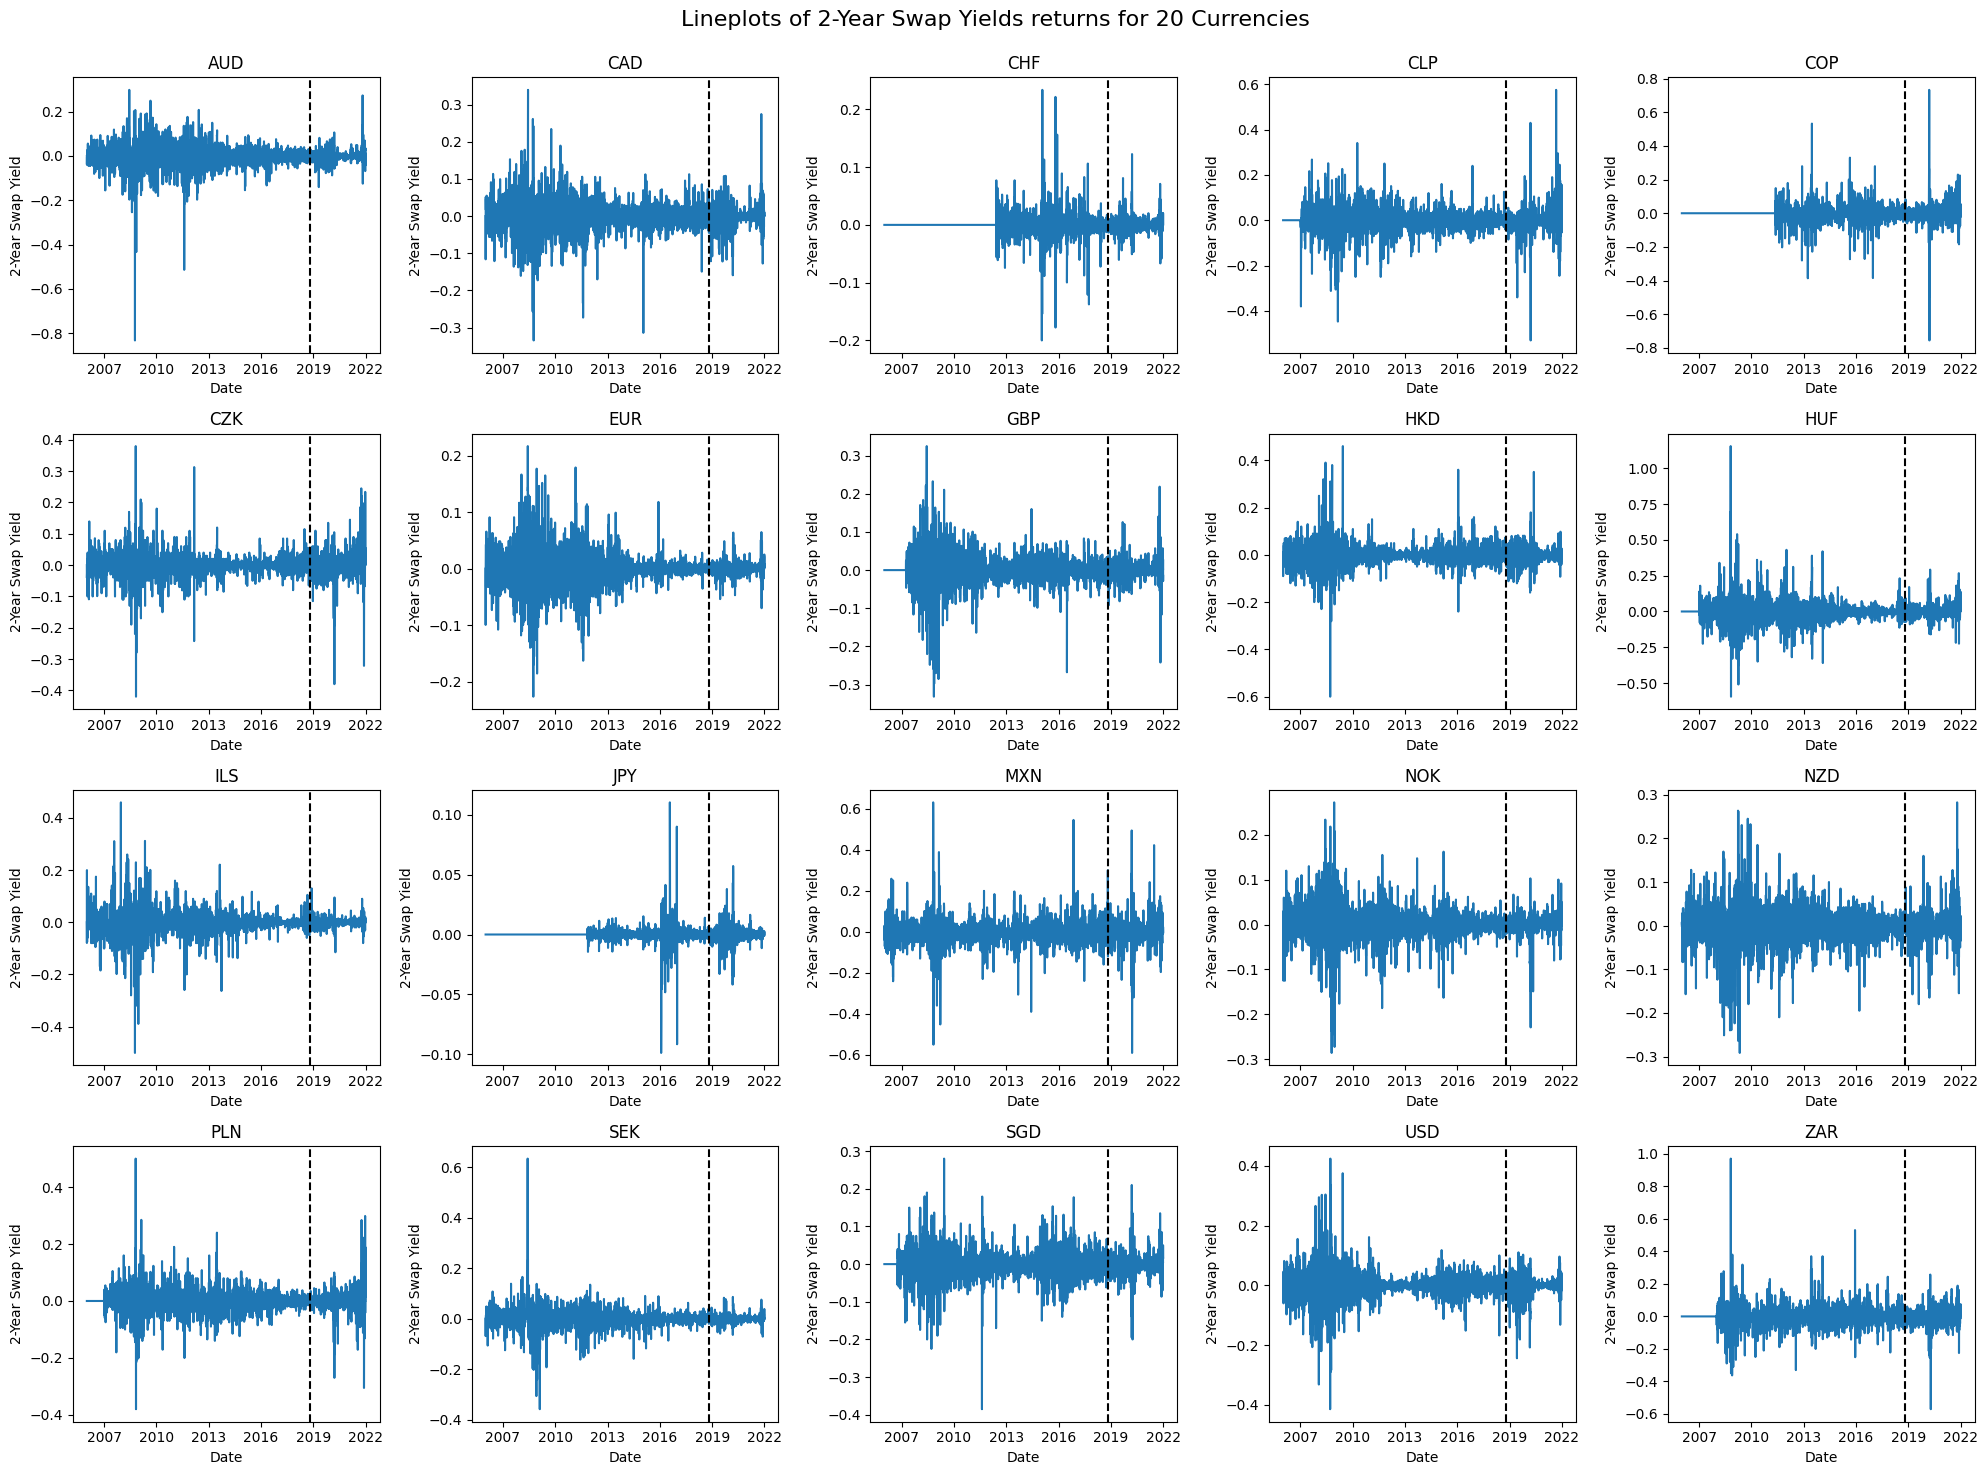

In [163]:
# Linesubplots of the 2-Year Swap Yields returns for 20 currencies using Seaborn
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, column in enumerate(returns.columns):
    sns.lineplot(x=returns.index, y=returns[column], ax=axes[i], label=column, legend=False)
    axes[i].set_title(column)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('2-Year Swap Yield')
    axes[i].grid(False)
    axes[i].xaxis.set_major_locator(mdates.YearLocator(3))
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    axes[i].axvline(x=split_date, color='black', linestyle='--')


plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.suptitle('Lineplots of 2-Year Swap Yields returns for 20 Currencies', fontsize=16)
plt.show()

### Transactions costs

In [12]:
CCY_BIDASKS = {
    "AUD": 0.3,
    "CAD": 0.3,
    "CHF": 1,
    "CLP": 6,
    "COP": 6,
    "CZK": 2,
    "EUR": 0.2,
    "GBP": 0.2,
    "HKD": 2,
    "HUF": 4,
    "ILS": 1,
    "JPY": 0.5,
    "MXN": 2,
    "NOK": 2,
    "SEK": 1,
    "NZD": 2,
    "PLN": 2,
    "SGD": 0.5,
    "USD": 0.1,
    "ZAR": 2
}

## Strategy train

In [9]:
windows = range(2, 201, 1)

ma_methods = {
    'SMA': ta.sma, 
    'EMA': ta.ema, 
    'WMA': ta.wma,
    'TRIMA': ta.trima,
    'KAMA': ta.kama,
    'HMA': ta.hma
}

color_map = {
    'SMA': 'blue',
    'EMA': 'orange',
    'WMA': 'green',
    'TRIMA': 'red',
    'KAMA': 'purple',
    'HMA': 'brown'
}

In [25]:
def compute_sharpe_ratio(dataset, asset, window, ma_type='SMA'):
    def compute_positions_matrix(series, window, ma_type):
        moving_average = ma_methods[ma_type](series, window)
        positions = (series > moving_average).astype(int).replace(0, -1)
        positions[moving_average.isna()] = 0

        first_non_null_date = positions.ne(0).idxmax()
        first_non_null_value = positions.loc[first_non_null_date]
        
        first_change_date = positions.loc[first_non_null_date:].ne(first_non_null_value).idxmax()
        
        try:
            previous_date = positions.loc[first_non_null_date:first_change_date].index[-2]
        except IndexError:
            previous_date = first_non_null_date
        
        positions.loc[first_non_null_date:previous_date] = 0
        return positions

    def compute_trade_matrix(positions):
        change_positions = positions.diff().fillna(0)
        change_positions[np.abs(change_positions) != 1] //= 2
        return np.abs(change_positions)

    returns = dataset[asset].diff().fillna(0)
    series = dataset[asset]

    positions = compute_positions_matrix(series, window, ma_type)
    weights = positions
    portfolio_returns = returns * weights.shift(1).fillna(0)

    trade_matrix = compute_trade_matrix(positions)
    transaction_costs = trade_matrix * (CCY_BIDASKS[asset] / 100)
    
    portfolio_returns_net = portfolio_returns - transaction_costs
    total_returns = portfolio_returns_net

    if total_returns.std() == 0:
        sharpe_ratio = 0
    else:
        sharpe_ratio = (total_returns.mean() / total_returns.std()) * np.sqrt(250)

    return sharpe_ratio

In [167]:
def plot_sharpe_ratios(df_train, asset_windows, ma_types):
    plt.figure(figsize=(20, 5 * len(asset_windows)))

    for i, (asset, windows) in enumerate(asset_windows.items(), 1):
        sharpe_results = {}
        for ma_type in ma_types:
            sharpe_results[ma_type] = [
                compute_sharpe_ratio(df_train, asset, window, ma_type)
                for window in windows
            ]

        plt.subplot(len(asset_windows), 1, i)
        for ma_type, sharpes in sharpe_results.items():
            color = color_map.get(ma_type, 'black')
            plt.plot(windows, sharpes, label=f'{ma_type} Sharpe Ratio', color=color)
                
        plt.title(f'Sharpe Ratio Comparison for {asset}')
        plt.xlabel('Window Size')
        plt.ylabel('Sharpe Ratio')
        plt.xlim(min(windows), max(windows))
        plt.ylim(-0.2, 1.2)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

### Sharpe ratios on full train dataset

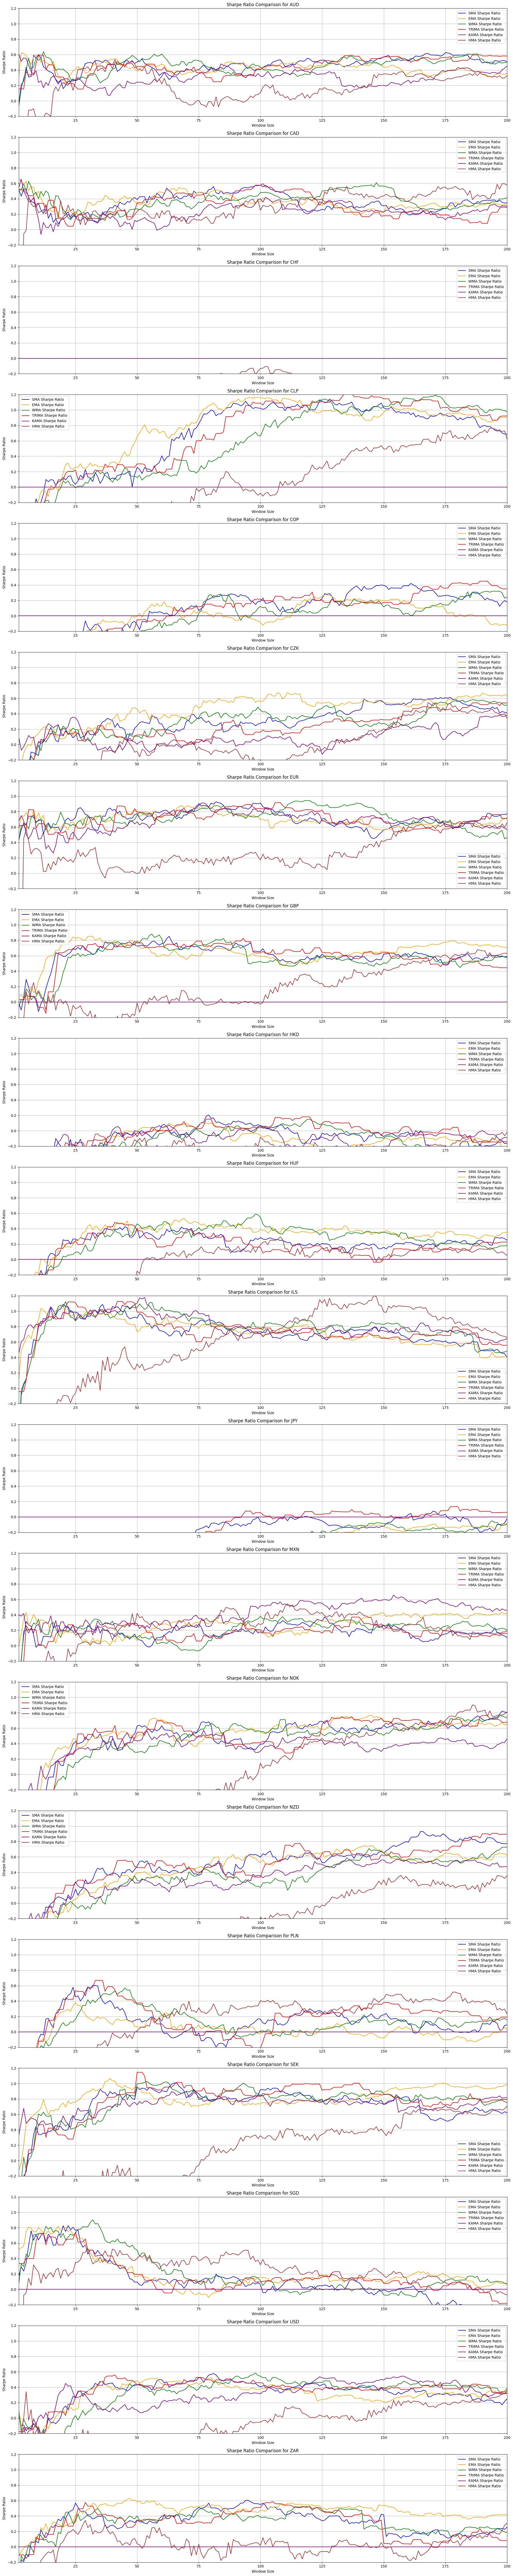

In [168]:
asset_windows = {asset: list(windows) for asset in df.columns}
ma_types = ['SMA', 'EMA', 'WMA', 'TRIMA', 'KAMA', 'HMA']
plot_sharpe_ratios(df_train, asset_windows, ma_types)

HMA gives bad results.

#### Selection of top currencies

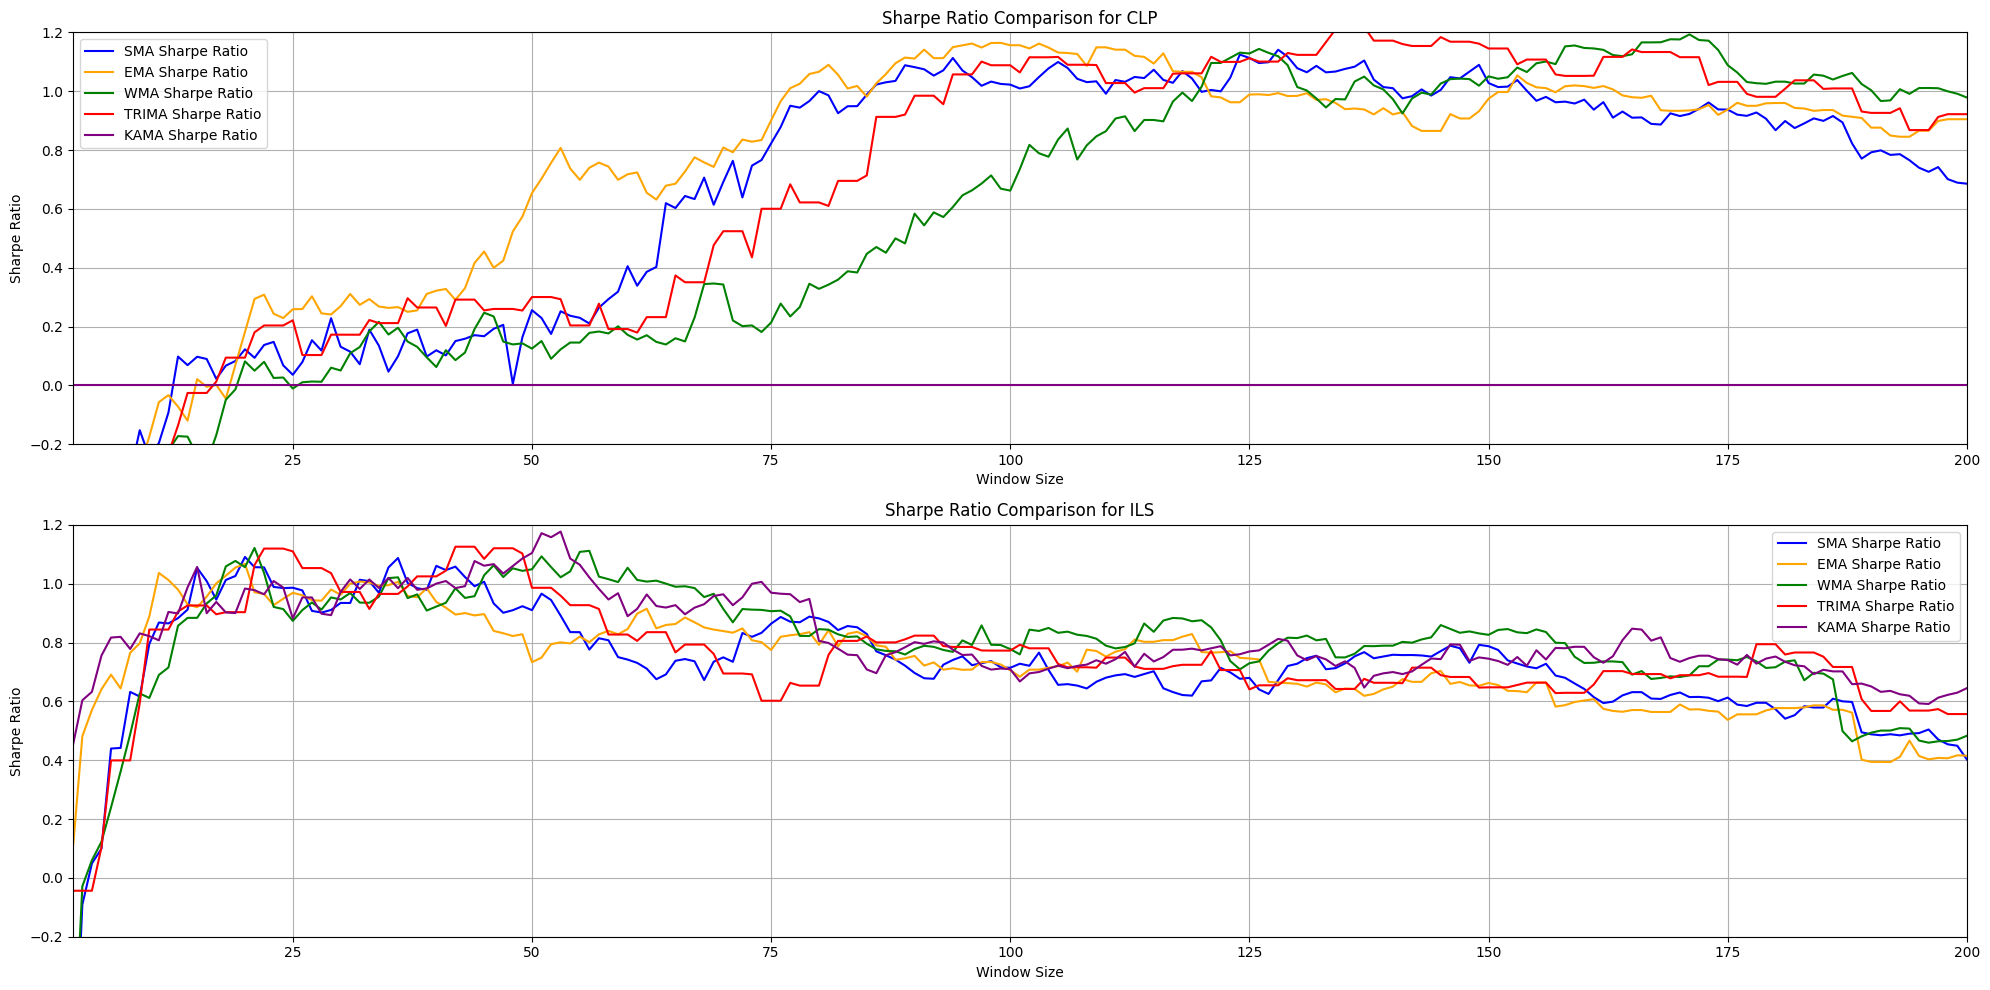

In [170]:
ma_types = ['SMA', 'EMA', 'WMA', 'TRIMA', 'KAMA']

assets_windows = {
    "CLP": windows,
    "ILS": windows,
}

plot_sharpe_ratios(df_train, assets_windows, ma_types)

#### Selection of windows intervals

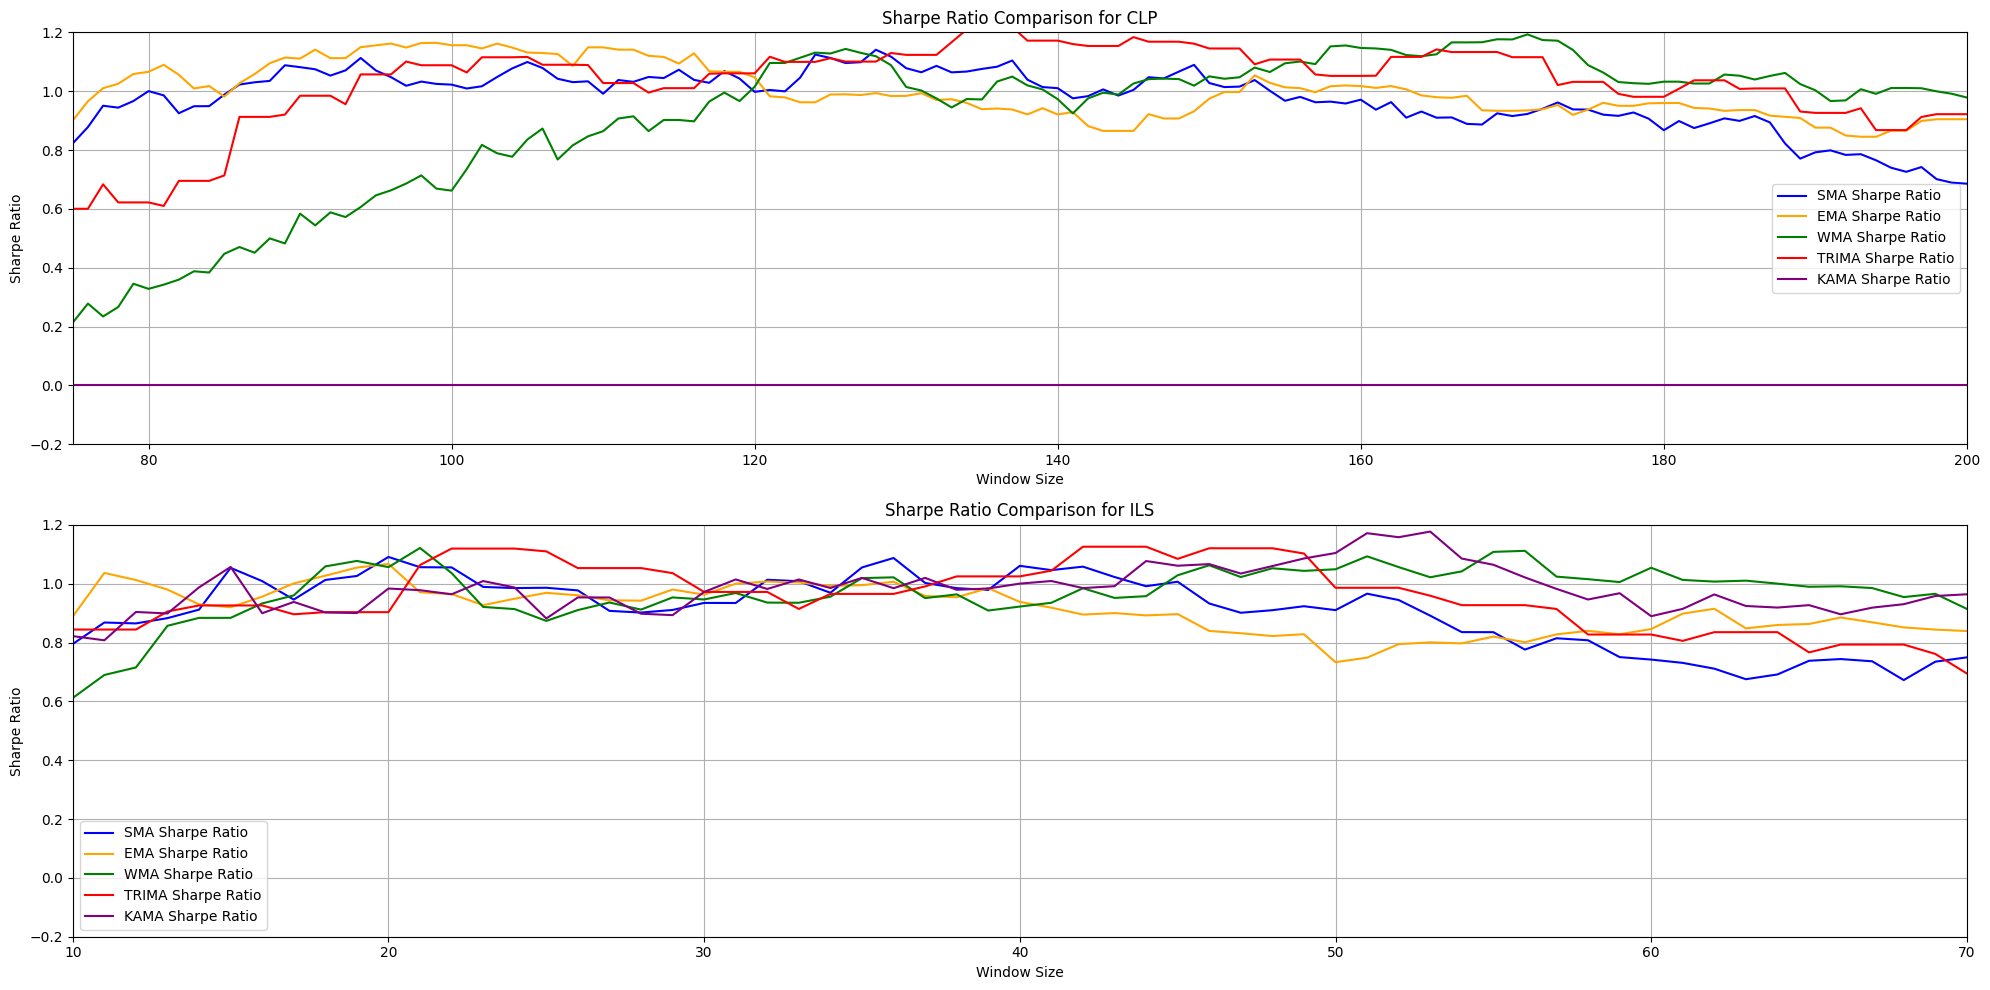

In [171]:
assets_windows = {
    "CLP": range(75, 201),
    "ILS": range(10, 71),
}

plot_sharpe_ratios(df_train, assets_windows, ma_types)

### Mean and variance of sharpe ratios on train subsets

In [ ]:
def plot_sharpe_ratios_multiple_subsets(df_train, selected_assets, ma_methods, subset_values):
    for num_subsets in subset_values:
        subset_size = len(df_train) // num_subsets
        subsets = [
            df_train.iloc[i * subset_size:(i + 1) * subset_size] for i in range(num_subsets)
        ]

        sharpe_ratios_stats = {}
        for asset, windows in selected_assets.items():
            sharpe_ratios_stats[asset] = {ma: {'mean': [], 'variance': []} for ma in ma_methods}
            for window in windows:
                for ma_method in ma_methods:
                    sharpe_values = [
                        compute_sharpe_ratio(subset, asset, window, ma_method)
                        for subset in subsets
                    ]
                    mean_sharpe = np.mean(sharpe_values)
                    var_sharpe = np.var(sharpe_values)
                    sharpe_ratios_stats[asset][ma_method]['mean'].append(mean_sharpe)
                    sharpe_ratios_stats[asset][ma_method]['variance'].append(var_sharpe)

        plt.figure(figsize=(15, 5 * len(selected_assets)))
        for i, (asset, ma_sharpes) in enumerate(sharpe_ratios_stats.items(), 1):
            plt.subplot(len(selected_assets), 1, i)
            for ma_method, stats in ma_sharpes.items():
                means = stats['mean']
                variances = stats['variance']
                color = color_map.get(ma_method, 'black')

                plt.plot(
                    selected_assets[asset],
                    means,
                    label=f'{ma_method} (Mean)',
                    linestyle='-',
                    color=color,
                    alpha=0.8
                )

                plt.plot(
                    selected_assets[asset],
                    variances,
                    label=f'{ma_method} (Variance)',
                    linestyle='--',
                    color=color,
                    alpha=0.6
                )

            plt.title(f'Sharpe Ratio by Window for {asset} (num_subsets = {num_subsets})')
            plt.xlabel('Window Size')
            plt.ylabel('Sharpe Ratio / Variance')
            plt.legend(title="MA Method")
            plt.grid(True)

        plt.tight_layout()
        plt.show()

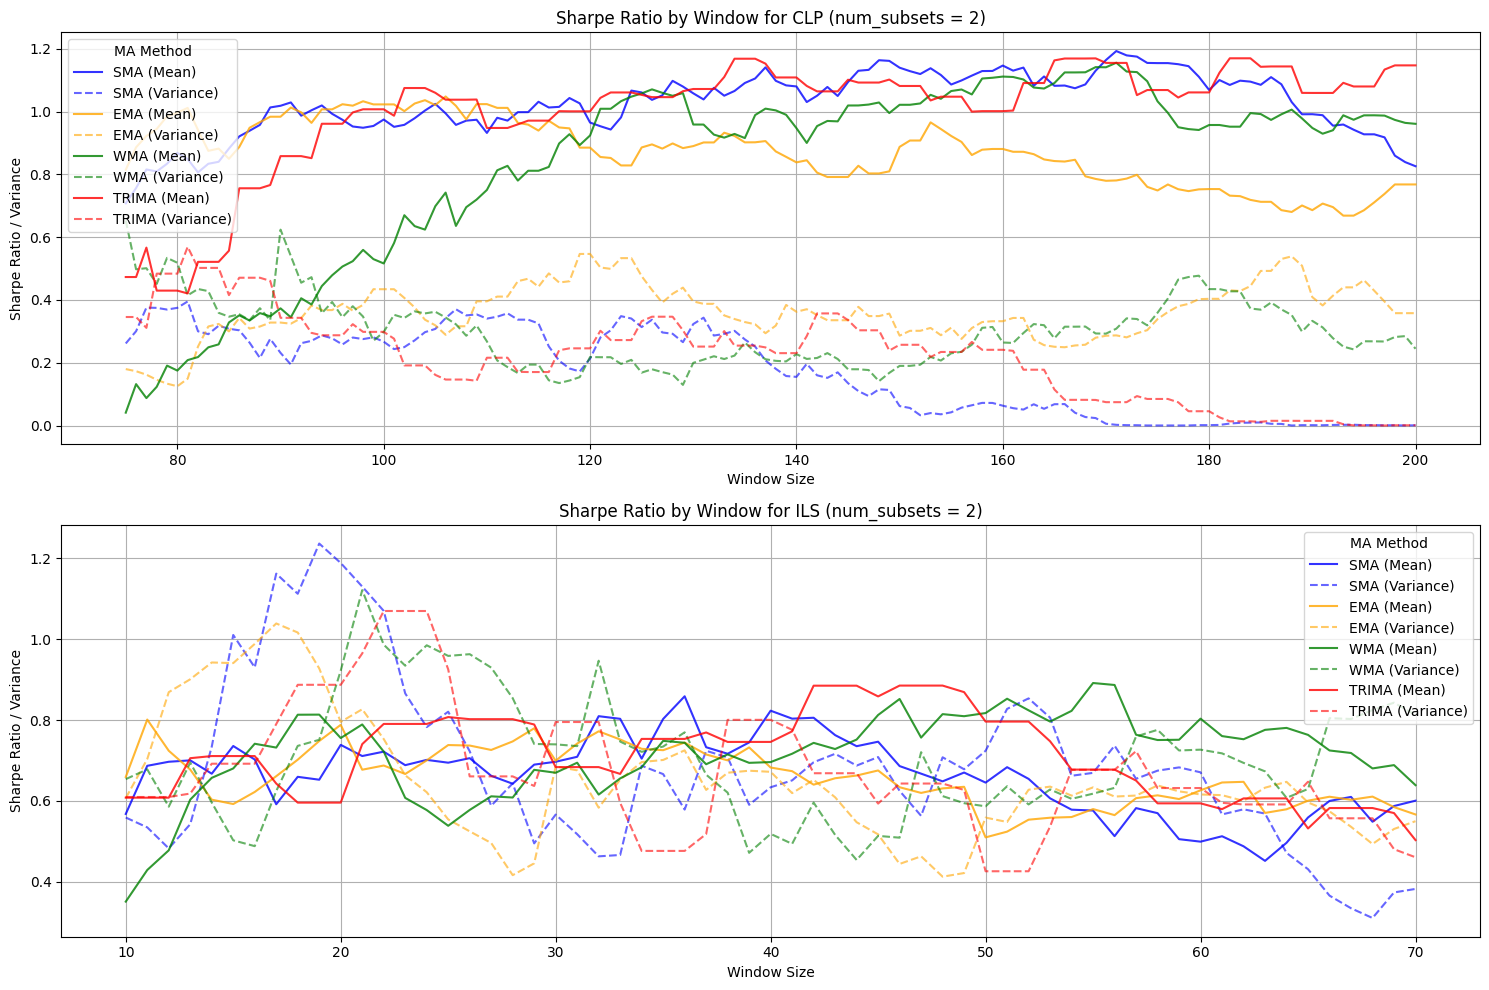

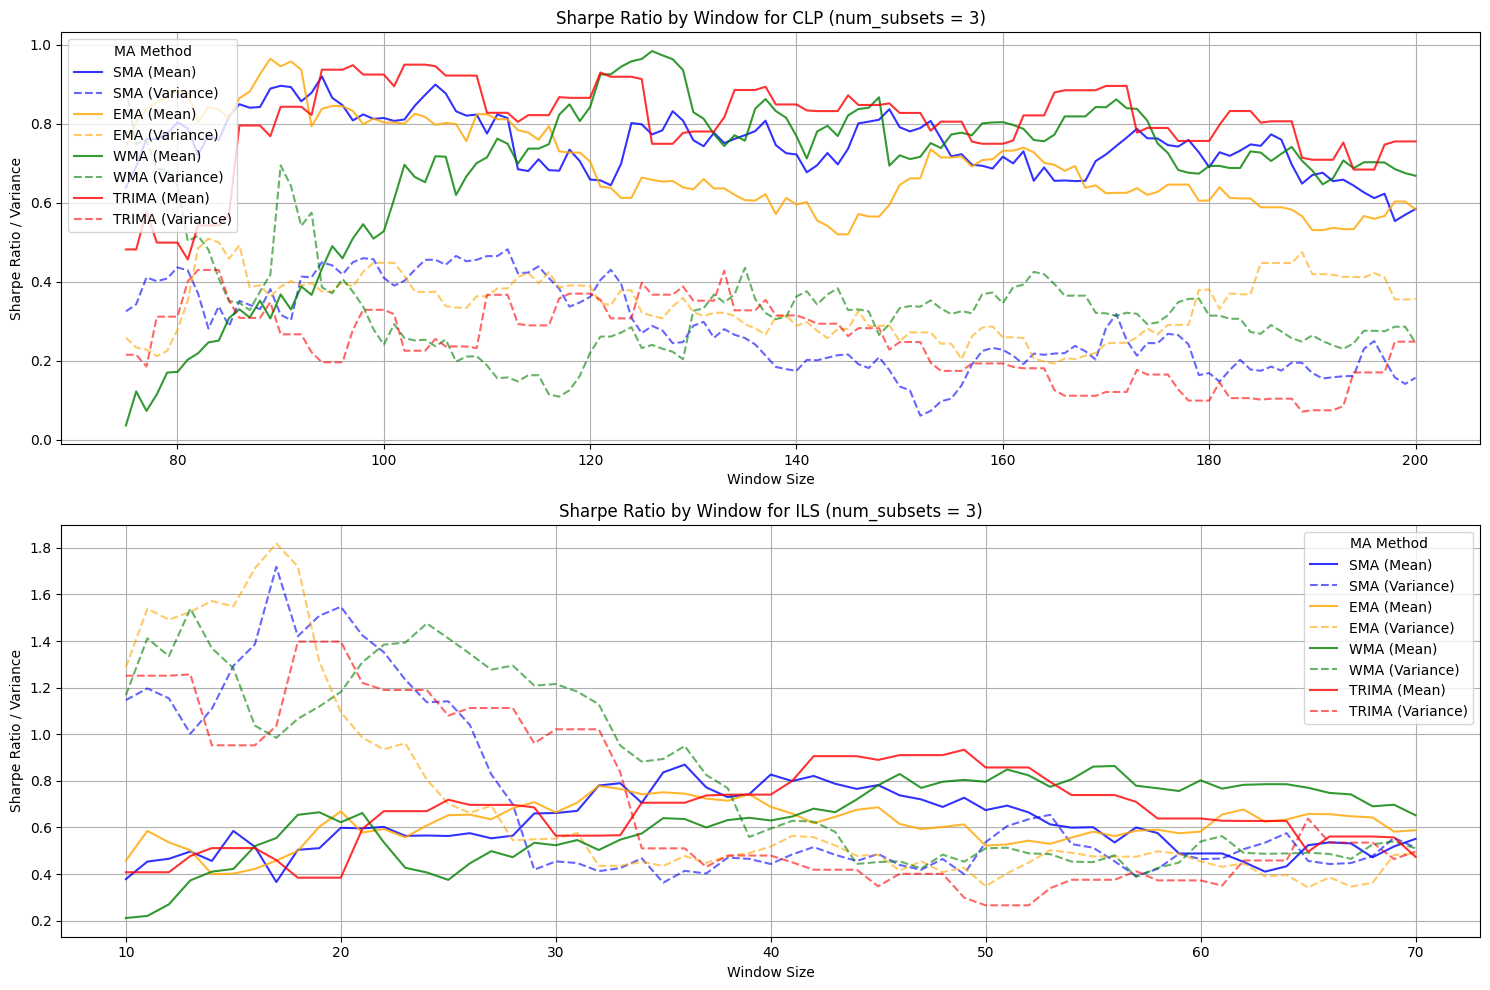

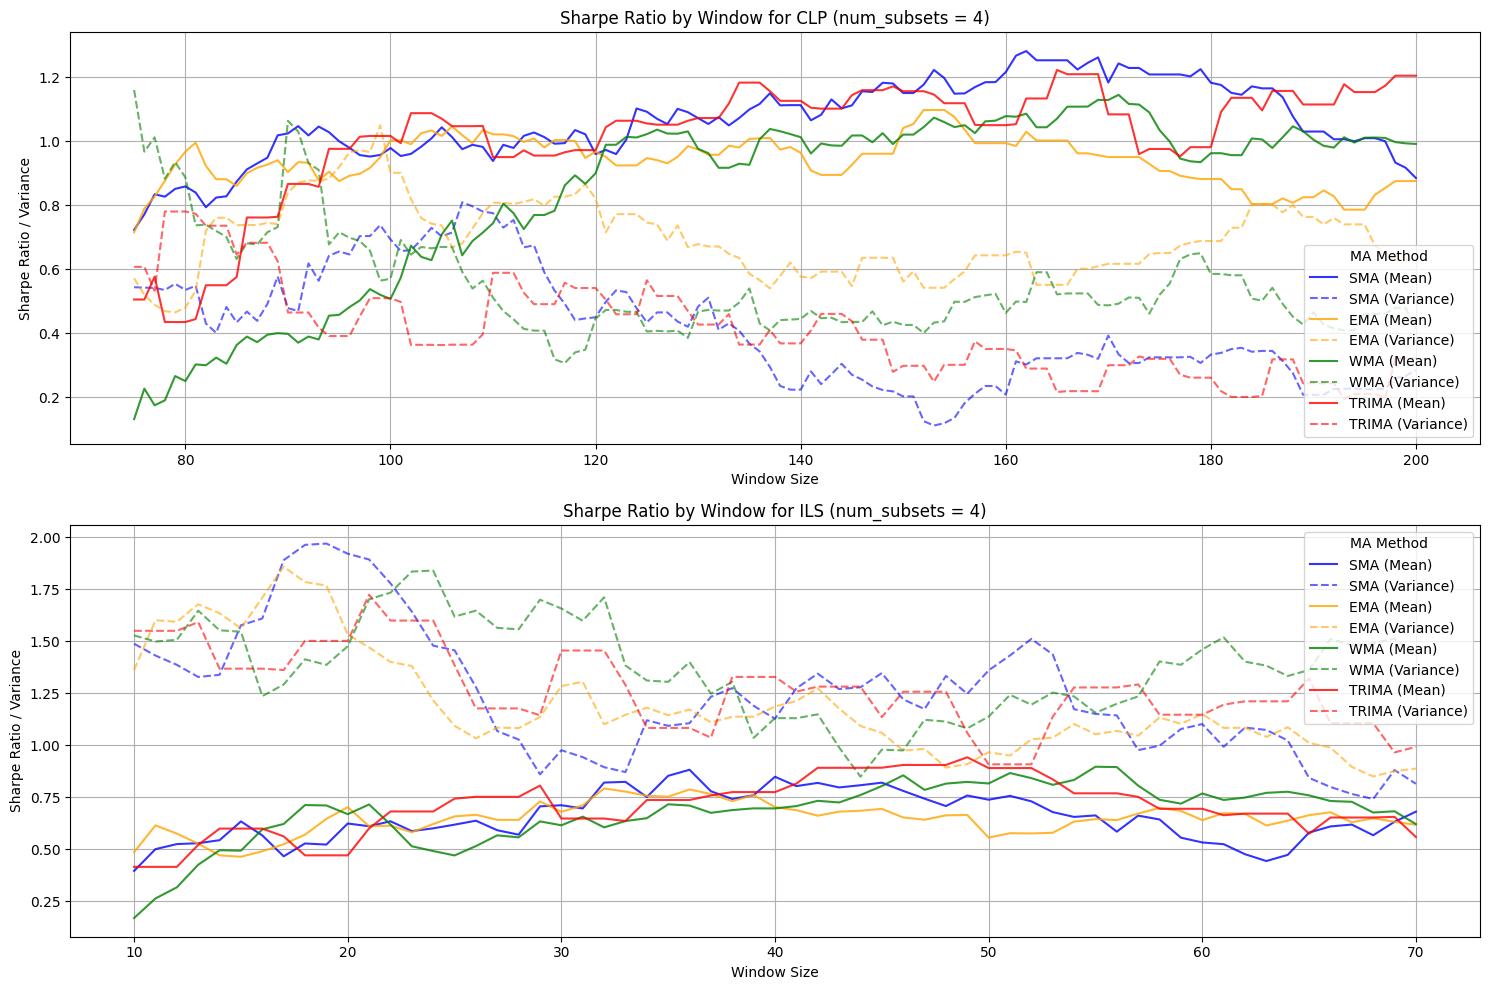

In [173]:
ma_types = ['SMA', 'EMA', 'WMA', 'TRIMA']
selected_assets = {
    "CLP": range(75, 201),
    "ILS": range(10, 71),
}
subset_values = [2, 3, 4]

plot_sharpe_ratios_multiple_subsets(df_train, selected_assets, ma_types, subset_values)

#### Selection of top currencies

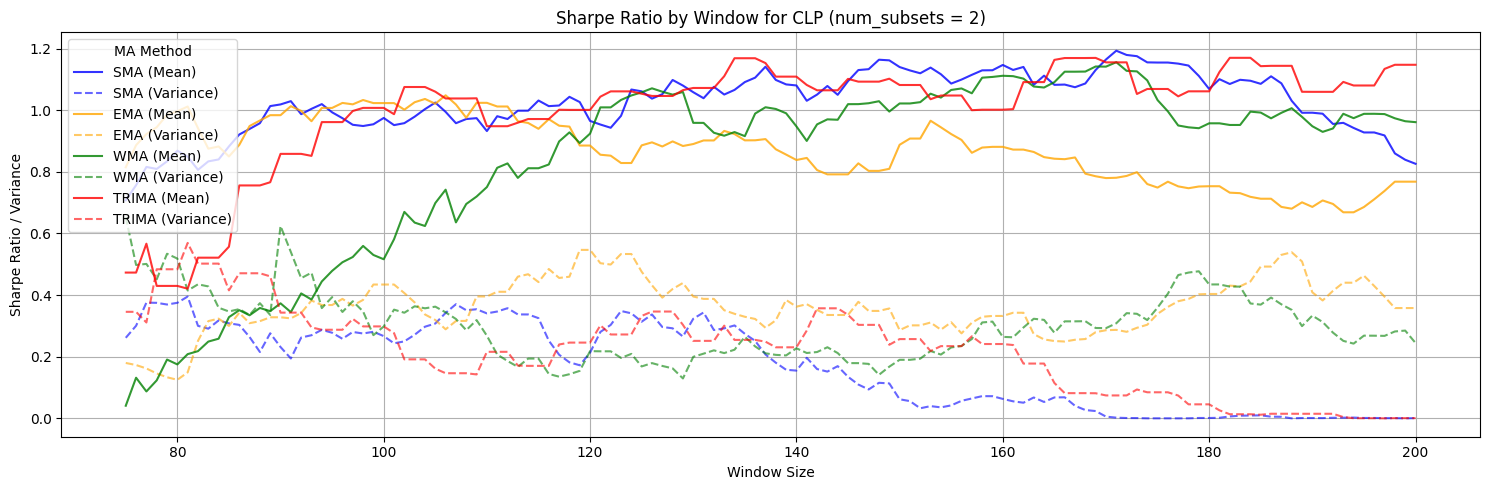

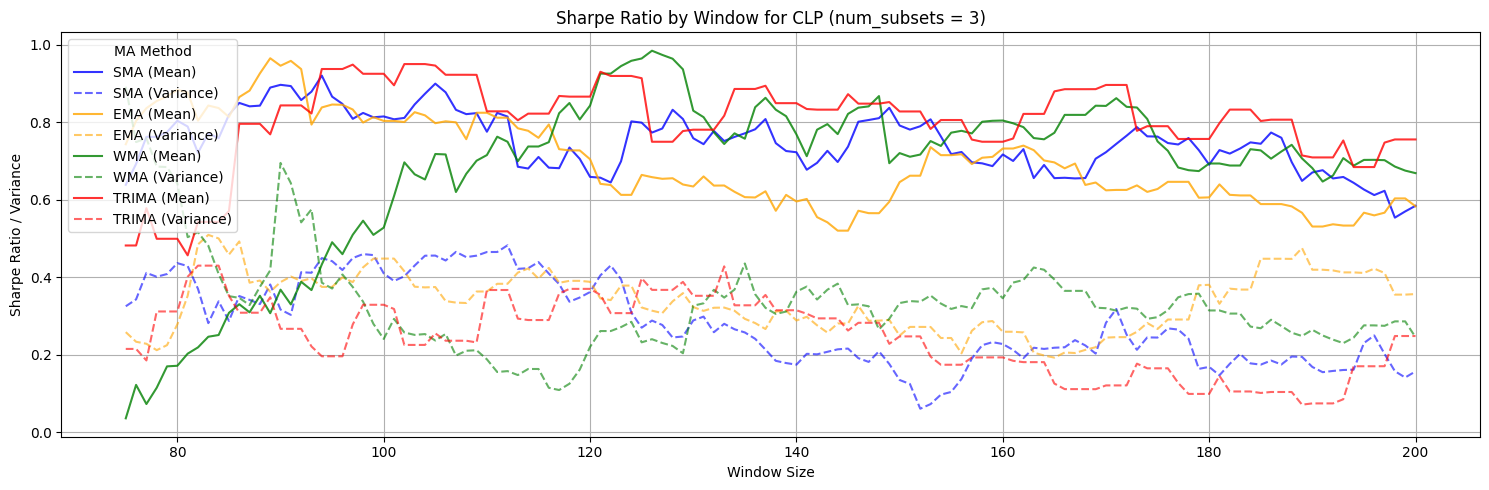

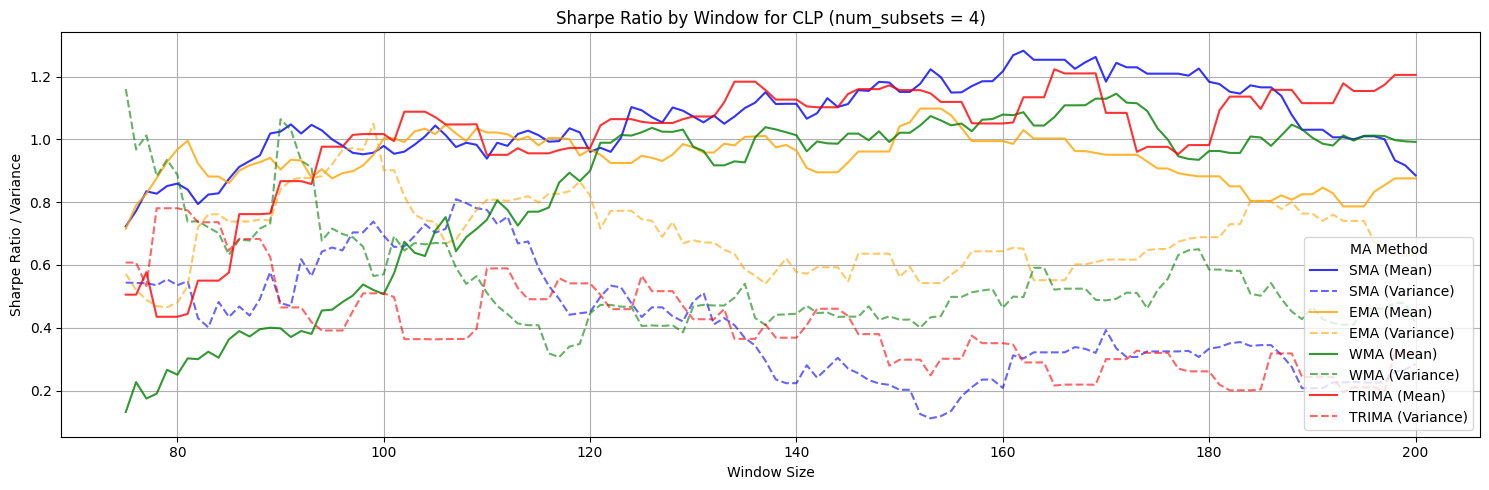

In [174]:
ma_types = ['SMA', 'EMA', 'WMA', 'TRIMA']
selected_assets = {
    "CLP": range(75, 201),
}
subset_values = [2, 3, 4] 

plot_sharpe_ratios_multiple_subsets(df_train, selected_assets, ma_types, subset_values)

#### Selection of MA types

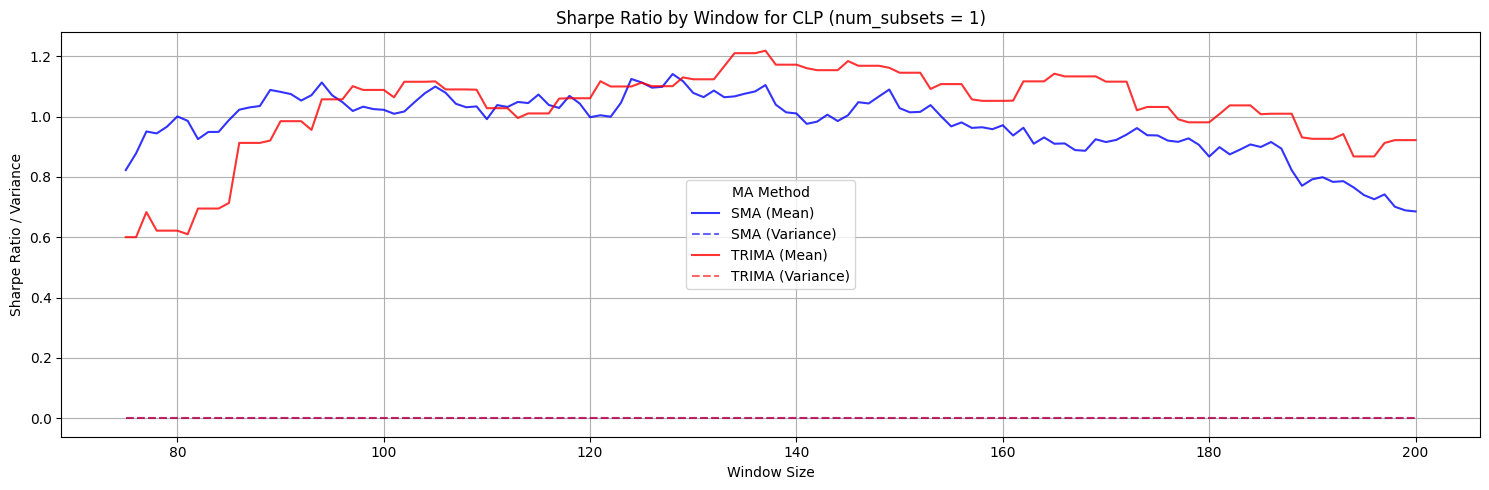

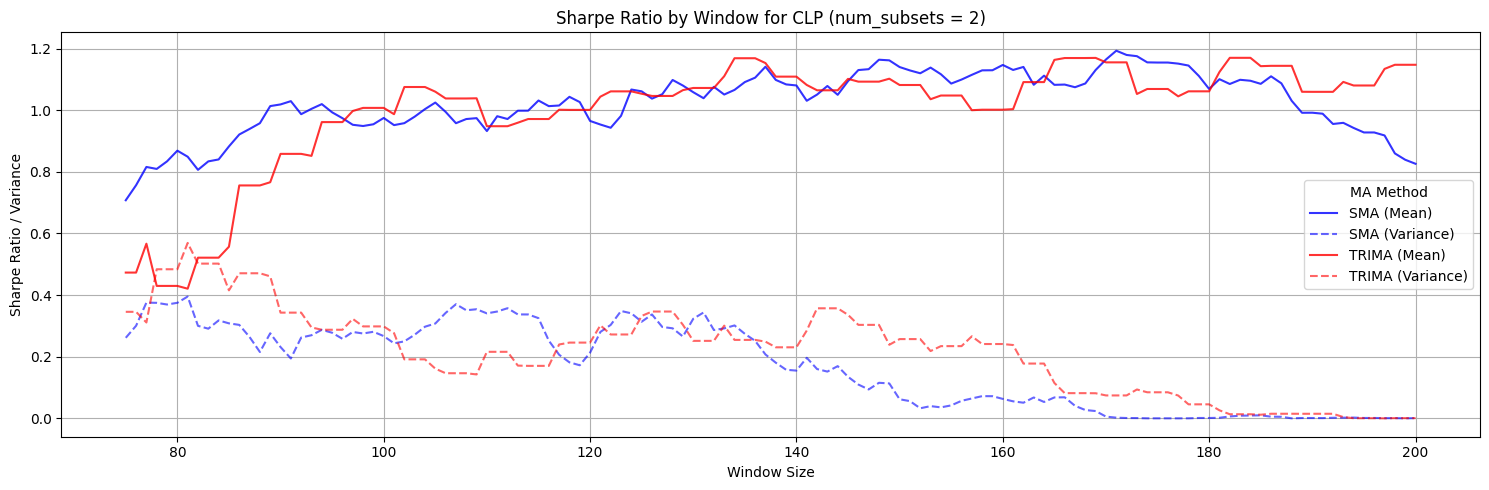

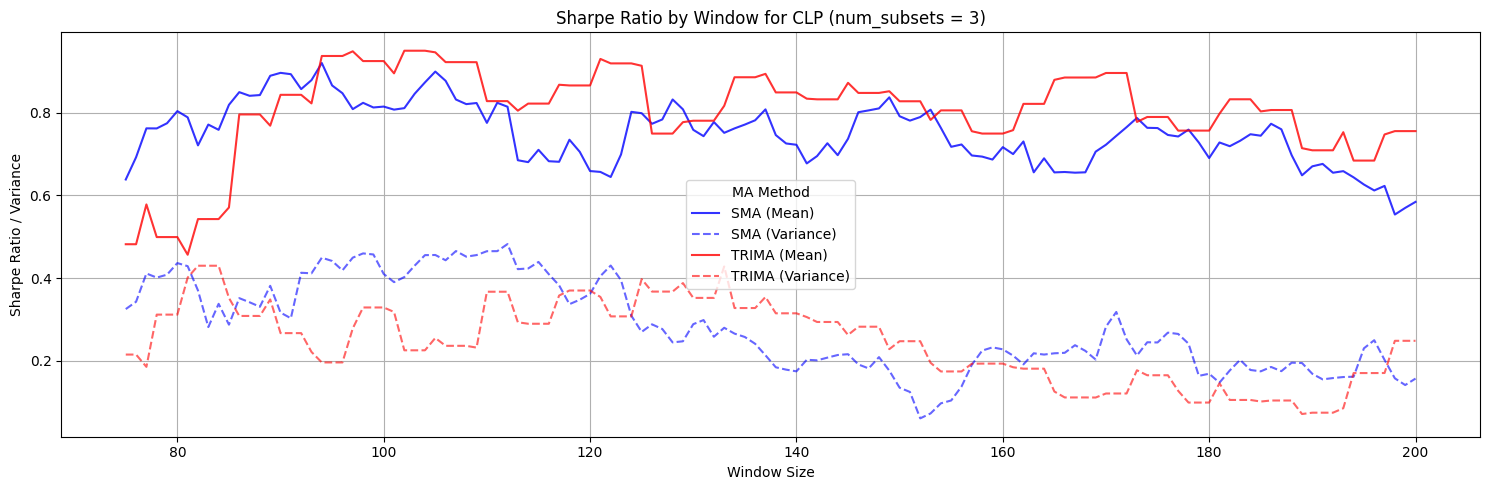

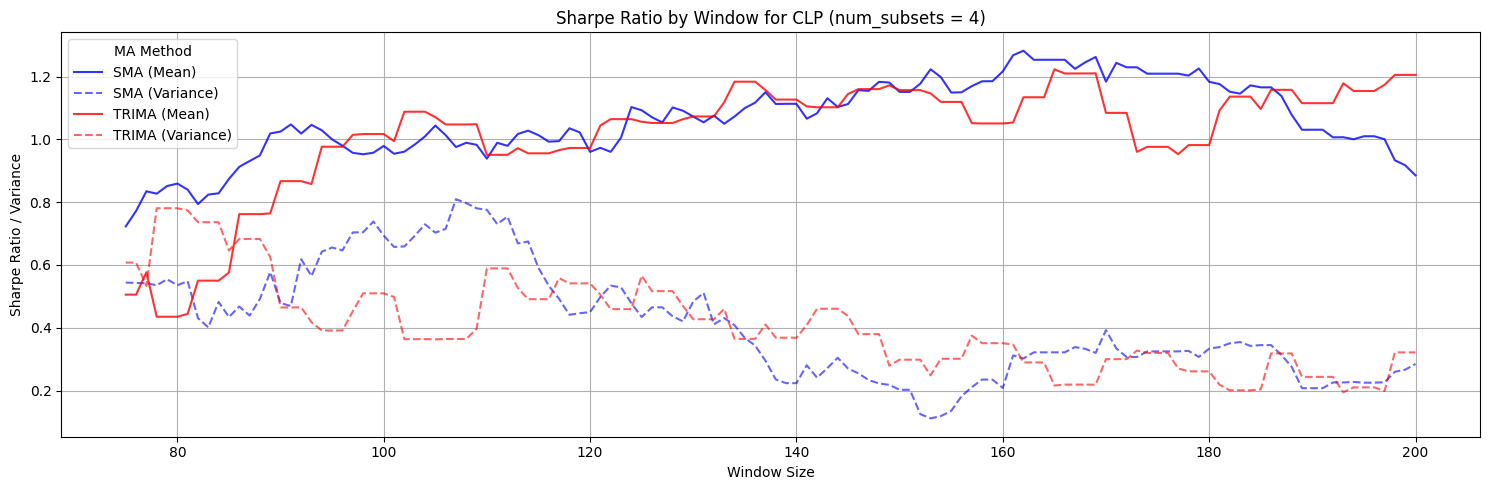

In [ ]:
ma_types = ['SMA', 'TRIMA']
selected_assets = {
    "CLP": range(75, 201),
}
subset_values = [1, 2, 3, 4]
plot_sharpe_ratios_multiple_subsets(df_train, selected_assets, ma_types, subset_values)

In [26]:
compute_sharpe_ratio(df_train, 'CLP', 165, 'TRIMA')

np.float64(1.1419113819897317)

## Strategy test

In [176]:
compute_sharpe_ratio(df_test, 'CLP', 165, 'TRIMA')

np.float64(1.6340007760879767)

## Strategy explanation

In [ ]:
selected_asset = ['CLP']
df_selected = df[selected_asset]
window = 165
ma_type = 'TRIMA'

moving_average_selected = ma_methods[ma_type](df_selected['CLP'], window)

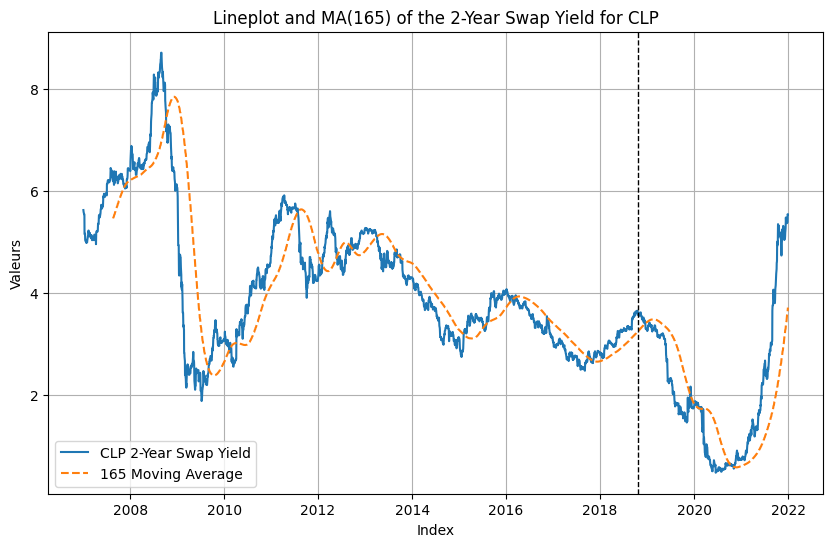

In [29]:
# Lineplot and MA of the 2-Year Swap Yield for the currency
plt.figure(figsize=(10, 6))

sns.lineplot(
    x=df_selected.index, 
    y=df_selected.iloc[:, 0],
    label=f"{selected_asset[0]} 2-Year Swap Yield"
)

sns.lineplot(
    x=moving_average_selected.index, 
    y=moving_average_selected.values,
    label=f"{window} Moving Average", 
    linestyle="--"
)

plt.axvline(x=split_date, color='black', linestyle='--', linewidth=1)

plt.title(f"Lineplot and MA({window}) of the 2-Year Swap Yield for {selected_asset[0]}")
plt.xlabel("Index")
plt.ylabel("Valeurs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def compute_portfolio_returns_net(dataset, asset, window, ma_type='SMA'):
    def compute_positions_matrix(series, window, ma_type):
        moving_average = ma_methods[ma_type](series, window)
        positions = (series > moving_average).astype(int).replace(0, -1)
        positions[moving_average.isna()] = 0

        first_non_null_date = positions.ne(0).idxmax()
        first_non_null_value = positions.loc[first_non_null_date]
        
        first_change_date = positions.loc[first_non_null_date:].ne(first_non_null_value).idxmax()
        
        try:
            previous_date = positions.loc[first_non_null_date:first_change_date].index[-2]
        except IndexError:
            previous_date = first_non_null_date
        
        positions.loc[first_non_null_date:previous_date] = 0
        return positions

    def compute_trade_matrix(positions):
        change_positions = positions.diff().fillna(0)
        change_positions[np.abs(change_positions) != 1] //= 2
        return np.abs(change_positions)

    returns = dataset[asset].diff().fillna(0)
    series = dataset[asset]

    positions = compute_positions_matrix(series, window, ma_type)
    weights = positions
    portfolio_returns = returns * weights.shift(1).fillna(0)

    trade_matrix = compute_trade_matrix(positions)
    transaction_costs = trade_matrix * (CCY_BIDASKS[asset] / 100)
    
    portfolio_returns_net = portfolio_returns - transaction_costs
    total_returns = portfolio_returns_net

    return total_returns.cumsum()

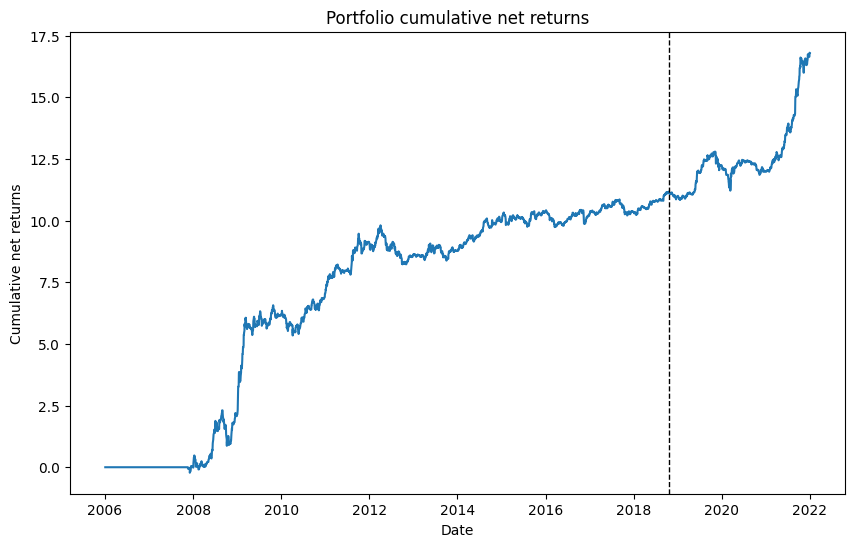

In [23]:
# Lineplot of the portfolio cumulative net returns
plt.figure(figsize=(10, 6))
plt.plot(compute_portfolio_returns_net(df_selected, 'CLP', 165, 'TRIMA'))
plt.axvline(x=split_date, color='black', linestyle='--', linewidth=1)
plt.title('Portfolio cumulative net returns')
plt.xlabel('Date')
plt.ylabel('Cumulative net returns')
plt.grid(False)